In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [3]:
class Ising:
    def __init__(self, L, T):
        self.L = L
        self.T = T
        self.E = 0
        w = {}
        for i in range(L):
            for j in range(L):
                for k in range(L):
                    w[i,j,k] = 0

        self.x = w
    def SetGS(self):
        for i in range(self.L):
            for j in range(self.L):
                for k in range(self.L):
                    self.x[i,j,k] = 1
        self.E = 0
        
    def Random(self):
        for i in range(self.L):
            for j in range(self.L):
                for k in range(self.L):
                    a = np.random.rand()
                    if a > 0.5:
                        self.x[i,j,k] = 1
                    else:
                        self.x[i,j,k] = -1


    def positions(self, i, j, k, pos):
        max = self.L-1
        if pos == 0: #pos up
            if i == max:
                return (0,j,k)
            else:
                return (i+1,j,k)
        elif pos == 1: #pos down
            if i == 0:
                return (max,j,k)
            else:
                return (i-1,j,k)
        elif pos == 2: #pos right
            if k == max:
                return (i,j,0)
            else:
                return (i,j,k+1)
        elif pos == 3: #pos left
            if k == 0:
                return (i,j,max)
            else:
                return (i,j,k-1)
        elif pos == 4: #pos front
            if j == max:
                return (i,0,k)
            else:
                return (i,j+1,k)
        elif pos == 5: #pos behind
            if j == 0:
                return (i,max,k)
            else:
                return (i,j-1,k)

    def delta_E(self, i, j, k):
        counter = 0    
        dE = 0
        for pos in range(0,6):
            counter += self.x[self.positions(i, j, k, pos)]
        dE = 2*counter*self.x[i,j,k]
        return dE

    def Metropolis(self):
        a, b, c = np.random.randint(0, self.L, 3)
        dE = self.delta_E( a, b, c)
        A = np.exp(-dE/self.T)
        t = np.random.rand()
        if t < A:
            self.x[ a, b, c] *= -1
            self.E += dE

    def Magnetization(self):
        m = 0
        for i in range(self.L):
            for j in range(self.L):
                for k in range(self.L):
                    m += self.x[i, j, k]

        return abs(m/(self.L*self.L*self.L))            

In [4]:
import timeit

start = timeit.default_timer()

l = 10
Lat = Ising(l,0.01)

m = []
E = []
X = []
C = []
w = []

a = np.linspace(2.01,3.51,4)
b = np.linspace(4.01,5.01,4)
c = np.linspace(5.51,7.01,4)

print("When the numbers printed below this cell \
reach 16 the computation will be completed.")

for k in range(12): # I put 12 becuase 4+4+4 = 12    
    if k < 4:
        w.append(a[k])
        
    elif 4 <= k < 8:      
        w.append(b[k-4])
        
    elif k-8 >= 0:        
        w.append(c[k-8])
        
    k += 1
    
w = np.linspace(2,7,11)
    
for j in range(len(w)):
    Lat.T = w[j]    
    Lat.SetGS()

    for n in range (100*pow(l,3)):
        Lat.Metropolis()
        n += 1

    x = []
    y = []
    z = []
    t = []

    for k in range(300):
        for i in range (pow(l,3)):            
            Lat.Metropolis()
            i += 1
        a = Lat.Magnetization()
        x.append(a)
        y.append(Lat.E)
        z.append(pow(a,2))
        t.append(pow(Lat.E,2))
        k += 1
    
    m.append(np.mean(x))
    E.append(np.mean(y))
    X.append((1/Lat.T)*(np.mean(z)-pow(np.mean(x),2)))
    C.append(1/pow(Lat.T,2)*(np.mean(t)-pow(np.mean(y),2)))
    j += 1
    
    print(j)

stop = timeit.default_timer()

print('Time: ', stop - start) 

When the numbers printed below this cell reach 16 the computation will be completed.
1
2
3
4
5
6
7
8
9
10
11
Time:  240.31338680000002


Text(0.5, 1.0, 'Magnetization')

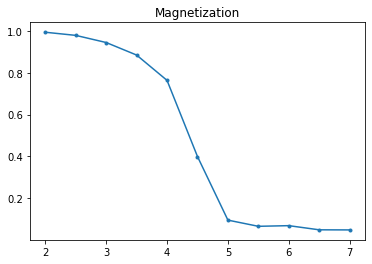

In [5]:
# Magnetization as a function of the temperature
plt.plot(w, m, '.-')
plt.title("Magnetization")

Text(0.5, 1.0, 'Energy')

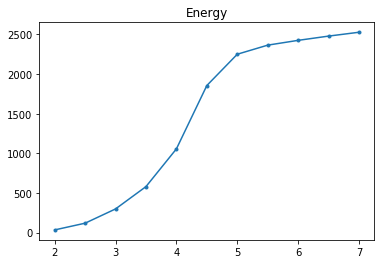

In [6]:
# Energy as a function of the temperature
plt.plot(w, E, '.-')
plt.title("Energy")

Text(0.5, 1.0, 'Susceptivity')

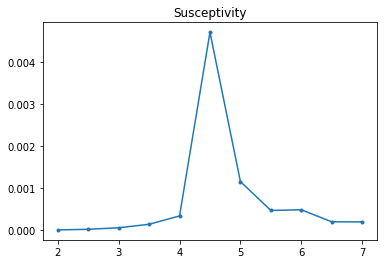

In [7]:
# Susceptivity as a function of temperature
plt.plot(w, X, '.-')
plt.title("Susceptivity")

Text(0.5, 1.0, 'Heat Capacity')

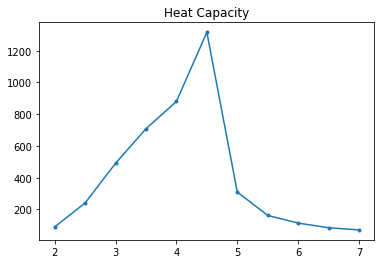

In [8]:
#Heat capacity as a function of temperature
plt.plot(w, C, '.-')
plt.title("Heat Capacity")